In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Fig 1

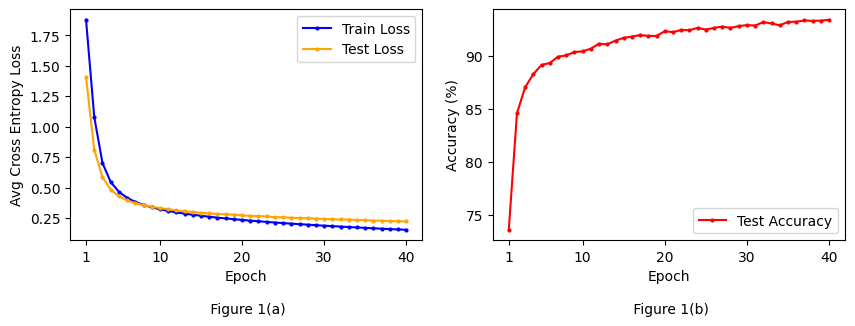

In [60]:
exp = "mlp_sgd_0.0_{i}.csv"
n_trials = 5

dfs = [pd.read_csv(f"./data/{exp.format(i=i)}") for i in range(n_trials)]
df_all = pd.concat(dfs, axis=0, keys=range(n_trials))

df_mean_sgd = (
    pd.concat(dfs, axis=1)
    .T.groupby(level=0)
    .mean()
    .T
)

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(df_mean_sgd["train_loss"], label="Train Loss", color="blue", marker='o', markersize=2)
ax[0].plot(df_mean_sgd["test_loss"], label="Test Loss", color="orange", marker='o', markersize=2)
ax[0].set_xlabel("Epoch\n\n Figure 1(a)")
ax[0].set_ylabel("Avg Cross Entropy Loss")
ax[0].set_xticks([0, 9,19,29,39], labels=[1,10,20,30,40])
ax[0].legend()
ax[1].plot(df_mean_sgd["test_acc"] * 100, label="Test Accuracy", color="red", marker='o', markersize=2)
ax[1].set_xlabel("Epoch\n\n Figure 1(b)")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xticks([0, 9,19,29,39], labels=[1,10,20,30,40])
ax[1].legend()

# Fig 2

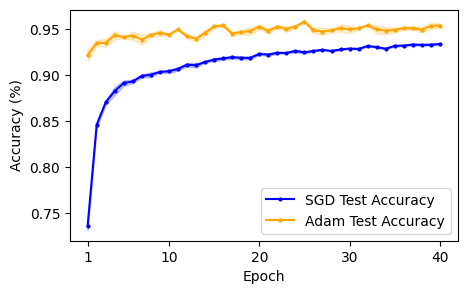

In [88]:
exp = "mlp_sgd_0.0_{i}.csv"
n_trials = 5

dfs = [pd.read_csv(f"./data/{exp.format(i=i)}") for i in range(n_trials)]
df_all = pd.concat(dfs, axis=0, keys=range(n_trials))

df_mean_sgd = (
    pd.concat(dfs, axis=1)
    .T.groupby(level=0)
    .mean()
    .T
)
df_std_sgd = (
    pd.concat(dfs, axis=1)
    .T.groupby(level=0)
    .std()
    .T
)

exp = "mlp_adam_0.0_{i}.csv"
n_trials = 5

dfs = [pd.read_csv(f"./data/{exp.format(i=i)}") for i in range(n_trials)]
df_all = pd.concat(dfs, axis=0, keys=range(n_trials))

df_mean_adam = (
    pd.concat(dfs, axis=1)
    .T.groupby(level=0)
    .mean()
    .T
)

df_std_adam = (
    pd.concat(dfs, axis=1)
    .T.groupby(level=0)
    .std()
    .T
)

fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.plot(df_mean_sgd["test_acc"], label="SGD Test Accuracy", color="blue", marker='o', markersize=2)
ax.fill_between(
    x=df_mean_sgd.index,
    y1=df_mean_sgd["test_acc"] - df_std_sgd["test_acc"] / (5**0.5),
    y2=df_mean_sgd["test_acc"] + df_std_sgd["test_acc"] / (5**0.5),
    color="blue",
    alpha=0.2
)
ax.plot(df_mean_adam["test_acc"], label="Adam Test Accuracy", color="orange", marker='o', markersize=2)
ax.fill_between(
    x=df_mean_adam.index,
    y1=df_mean_adam["test_acc"] - df_std_adam["test_acc"] / (5**0.5),
    y2=df_mean_adam["test_acc"] + df_std_adam["test_acc"] / (5**0.5),
    color="orange",
    alpha=0.2
)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy (%)")
ax.set_xticks([0, 9,19,29,39], labels=[1,10,20,30,40])
ax.legend()

# Fig 3

Text(0.5, 0, 'Dropout Probability\n\n Figure 3(b)')

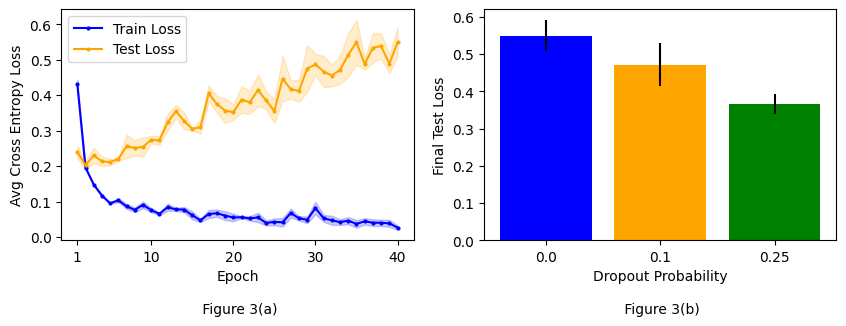

In [89]:
results_adam = {}
stderr_adam = {}
feature = "test_loss"
for p_dropout in [0.0, 0.1, 0.25]:
    p_dfs = []
    for i in range(n_trials):
        exp_name = f"mlp_adam_{p_dropout}_" + f"{i}.csv"
        df = pd.read_csv(f"./data/{exp_name}")
        p_dfs.append(df)
    p_df_mean = (
        pd.concat(p_dfs, axis=1)
        .T.groupby(level=0)
        .mean()
        .T
    )
    p_df_std = (
        pd.concat(p_dfs, axis=1)
        .T.groupby(level=0)
        .std()
        .T
    )

    results_adam[p_dropout] = p_df_mean[feature].iloc[-1].item()
    stderr_adam[p_dropout] = p_df_std[feature].iloc[-1].item() / (n_trials ** 0.5)

exp = "mlp_adam_0.0_{i}.csv"
n_trials = 5

dfs = [pd.read_csv(f"./data/{exp.format(i=i)}") for i in range(n_trials)]
df_all = pd.concat(dfs, axis=0, keys=range(n_trials))

df_mean_adam = (
    pd.concat(dfs, axis=1)
    .T.groupby(level=0)
    .mean()
    .T
)

exp = "mlp_adam_0.0_{i}.csv"
n_trials = 5

dfs = [pd.read_csv(f"./data/{exp.format(i=i)}") for i in range(n_trials)]
df_all = pd.concat(dfs, axis=0, keys=range(n_trials))

df_mean_adam = (
    pd.concat(dfs, axis=1)
    .T.groupby(level=0)
    .mean()
    .T
)

fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].plot(df_mean_adam["train_loss"], label="Train Loss", color="blue", marker='o', markersize=2)
ax[0].fill_between(
    x=df_mean_adam.index,
    y1=df_mean_adam["train_loss"] - df_std_adam["train_loss"] / (5**0.5),
    y2=df_mean_adam["train_loss"] + df_std_adam["train_loss"] / (5**0.5),
    color="blue",
    alpha=0.2
)
ax[0].plot(df_mean_adam["test_loss"], label="Test Loss", color="orange", marker='o', markersize=2)
ax[0].fill_between(
    x=df_mean_adam.index,
    y1=df_mean_adam["test_loss"] - df_std_adam["test_loss"] / (5**0.5),
    y2=df_mean_adam["test_loss"] + df_std_adam["test_loss"] / (5**0.5),
    color="orange",
    alpha=0.2
)
ax[0].set_xlabel("Epoch\n\n Figure 3(a)")

ax[1].bar(
    x=[0,1,2],
    height=[results_adam[0.0], results_adam[0.1], results_adam[0.25]],
    yerr=[stderr_adam[0.0], stderr_adam[0.1], stderr_adam[0.25]],
    color=["blue", "orange", "green"]
)
ax[1].set_xticks([0.0, 1, 2], labels=["0.0", "0.1", "0.25"])
ax[0].set_ylabel("Avg Cross Entropy Loss")
ax[0].set_xticks([0, 9,19,29,39], labels=[1,10,20,30,40])
ax[0].legend()
ax[1].set_ylabel("Final Test Loss")
ax[1].set_xlabel("Dropout Probability\n\n Figure 3(b)")